In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
PDAC_DIR = "./data/pdac"
SC_OUT_DIR = os.path.join(PDAC_DIR, "sc_adata")
PROJECT_ID = "CA001063"

In [3]:
adata = sc.read_h5ad(os.path.join(PDAC_DIR, "zenodo6024273/pk_all.h5ad"))
adata.obs

,CELL,Patient,Type,Cell_type,celltype0,celltype1,celltype2,celltype3,Patient2,nCount_RNA,...,classical_score21,basal_score21,endocrine_score_1,immune_score_1,exocrine_score_1,activated_stroma_score_1,histone_score_1,normal_stroma_score_1,olfactory_score_1,na_score_1
T1_AAACCTGAGATGTCGG,T1_AAACCTGAGATGTCGG,T1,Tumor,Fibroblast cell,fibroblast,fibroblast,fibroblast,fibroblast,CA001063_T1,11811.0,...,-0.098879,-0.064259,0.018068,-0.095694,-0.127464,0.337609,-0.002426,0.049558,-0.036479,-0.008173
T1_AAACGGGGTCATGCAT,T1_AAACGGGGTCATGCAT,T1,Tumor,Stellate cell,fibroblast,pancreatic stellate cell,pancreatic stellate cell,pancreatic stellate cell,CA001063_T1,1935.0,...,-0.078210,-0.044686,0.038831,-0.067339,-0.071143,0.061871,-0.023274,-0.001198,-0.039764,-0.008104
T1_AAAGATGCATGTTGAC,T1_AAAGATGCATGTTGAC,T1,Tumor,Macrophage cell,hematopoietic cell,myeloid leukocyte,myeloid dendritic cell,CD1c-positive myeloid dendritic cell,CA001063_T1,3811.0,...,-0.010048,-0.070665,0.012690,0.077253,-0.068349,-0.090711,-0.030058,0.003450,-0.029820,-0.015801
T1_AAAGATGGTCGAGTTT,T1_AAAGATGGTCGAGTTT,T1,Tumor,Macrophage cell,hematopoietic cell,myeloid leukocyte,macrophage,macrophage,CA001063_T1,2069.0,...,0.009496,0.022807,0.009687,0.053046,-0.006328,-0.086935,-0.028608,-0.031481,-0.049424,0.025834
T1_AAAGATGGTCTCTCTG,T1_AAAGATGGTCTCTCTG,T1,Tumor,Endothelial cell,endothelial cell,blood vessel endothelial cell,blood vessel endothelial cell,blood vessel endothelial cell,CA001063_T1,8706.0,...,-0.069608,-0.009706,0.001603,-0.019081,-0.164317,-0.021227,0.102929,-0.022376,-0.060222,-0.005385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pk210318_TTTGGTTTCCGATCTC-1,NA,pk210318,Tumor,Macrophage cell,NA,NA,NA,NA,OUGS_T4,1740.0,...,-0.061625,-0.044168,-0.014423,0.094185,-0.072897,-0.017155,0.079092,-0.005438,-0.001765,-0.013295
pk210318_TTTGGTTTCCTTCACG-1,NA,pk210318,Tumor,Macrophage cell,NA,NA,NA,NA,OUGS_T4,1177.0,...,-0.020811,-0.077266,-0.011746,0.081346,-0.036612,-0.036467,0.058162,0.011655,0.006083,-0.010507
pk210318_TTTGTTGCAATGCAAA-1,NA,pk210318,Tumor,T cell,NA,NA,NA,NA,OUGS_T4,5833.0,...,-0.127238,-0.103764,-0.017538,0.185434,-0.089159,-0.111194,-0.019965,-0.030641,-0.048538,-0.018958
pk210318_TTTGTTGGTATGAGCG-1,NA,pk210318,Tumor,T cell,NA,NA,NA,NA,OUGS_T4,4695.0,...,-0.078554,-0.074997,-0.013946,0.134630,-0.048846,-0.054666,-0.018734,-0.024168,-0.042796,0.002950


In [23]:
orig_cell_types = adata.obs[adata.obs["Project"] == "GSE111672"].index.to_series().map(lambda x: x.split("_")[3].rstrip(".0123456789"))
orig_cell_types.name = "orig_cell_type"
cell_type_df = pd.concat([adata.obs.loc[adata.obs["Project"] == "GSE111672", "Cell_type"], orig_cell_types], axis=1)
cell_type_df


,Cell_type,orig_cell_type
GSE111672_PDAC_A_Ductal...terminal.ductal.like.1,Ductal cell type 2,Ductal...terminal.ductal.like
GSE111672_PDAC_A_Cancer.clone.A,Ductal cell type 2,Cancer.clone.A
GSE111672_PDAC_A_Cancer.clone.A.1,Ductal cell type 2,Cancer.clone.A
GSE111672_PDAC_A_Ductal...CRISP3.high.centroacinar.like.1,Ductal cell type 2,Ductal...CRISP3.high.centroacinar.like
GSE111672_PDAC_A_Ductal...terminal.ductal.like.2,Ductal cell type 2,Ductal...terminal.ductal.like
...,...,...
GSE111672_PDAC_B_Cancer.clone.A.337,Ductal cell type 2,Cancer.clone.A
GSE111672_PDAC_B_Monocytes.18,Macrophage cell,Monocytes
GSE111672_PDAC_B_Cancer.clone.A.338,Ductal cell type 2,Cancer.clone.A
GSE111672_PDAC_B_Ductal...terminal.ductal.like.735,Ductal cell type 2,Ductal...terminal.ductal.like


In [24]:
from sklearn.metrics import jaccard_score
from joblib import Parallel, delayed
import itertools

cell_types = np.unique(cell_type_df["Cell_type"])
orig_cell_types = np.unique(cell_type_df["orig_cell_type"])

# cell_type_to_ord = {c_type: i for i, c_type in enumerate(cell_types)}
# orig_cell_type_to_ord = {c_type: i for i, c_type in enumerate(orig_cell_types)}

cell_type_one_hot = np.asarray([(cell_type_df["Cell_type"] == c_type).to_numpy().astype(int) for c_type in cell_types])
orig_cell_type_one_hot = np.asarray([(cell_type_df["orig_cell_type"] == c_type).to_numpy().astype(int) for c_type in orig_cell_types])
    
fun = lambda i, j: (i, j, jaccard_score(cell_type_one_hot[i], orig_cell_type_one_hot[j]))
long_list = Parallel(n_jobs=-1)(delayed(fun)(*item) for item in itertools.product(range(len(cell_types)), range(len(orig_cell_types))))
# long_list = [fun(*item) for item in itertools.product(range(len(cell_types)), range(len(orig_cell_types)))]

long_df = pd.DataFrame(long_list, columns=["cell_type", "orig_cell_type", "jaccard_score"])
long_df["cell_type"] = cell_types[long_df["cell_type"]]
long_df["orig_cell_type"] = orig_cell_types[long_df["orig_cell_type"]]
wide_df = long_df.pivot(index="cell_type", columns="orig_cell_type", values="jaccard_score")
wide_df

orig_cell_type,Acinar.cells,Cancer.clone.A,Cancer.clone.B,Ductal...APOL1.high.hypoxic,Ductal...CRISP3.high.centroacinar.like,Ductal...MHC.Class.II,Ductal...terminal.ductal.like,Endocrine.cells,Endothelial.cells,Fibroblasts,...,Macrophages.B,Mast.cells,Monocytes,RBCs,T.cells...NK.cells,Tuft.cells,mDCs,mDCs.A,mDCs.B,pDCs
cell_type,,,,,,,,,,,,,,,,,,,,,
Acinar cell,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ductal cell type 1,0.0,0.005537,0.000000,0.041139,0.276451,0.189873,0.013280,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ductal cell type 2,0.0,0.169560,0.062546,0.068915,0.144986,0.120925,0.376501,0.002582,0.000348,0.000000,...,0.000000,0.00000,0.000000,0.000370,0.000000,0.025537,0.000000,0.000000,0.000000,0.000000
Endocrine cell,0.0,0.000000,0.000000,0.000000,0.002907,0.000000,0.000915,0.400000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Endothelial cell,0.0,0.000000,0.000000,0.000000,0.000000,0.001524,0.000000,0.000000,0.941176,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fibroblast cell,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040230,0.416667,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Macrophage cell,0.0,0.000000,0.000000,0.000000,0.001164,0.000000,0.001585,0.000000,0.002857,0.000000,...,0.104396,0.00000,0.208791,0.000000,0.000000,0.000000,0.192308,0.065934,0.181319,0.059783
T cell,0.0,0.000000,0.000000,0.000000,0.005181,0.000000,0.020761,0.008850,0.000000,0.000000,...,0.000000,0.27551,0.000000,0.000000,0.408163,0.000000,0.000000,0.000000,0.000000,0.018349


In [25]:
orig_cell_types

array(['Acinar.cells', 'Cancer.clone.A', 'Cancer.clone.B',
       'Ductal...APOL1.high.hypoxic',
       'Ductal...CRISP3.high.centroacinar.like', 'Ductal...MHC.Class.II',
       'Ductal...terminal.ductal.like', 'Endocrine.cells',
       'Endothelial.cells', 'Fibroblasts', 'Macrophages', 'Macrophages.A',
       'Macrophages.B', 'Mast.cells', 'Monocytes', 'RBCs',
       'T.cells...NK.cells', 'Tuft.cells', 'mDCs', 'mDCs.A', 'mDCs.B',
       'pDCs'], dtype=object)

In [16]:
np.ndarray((cell_type_df["Cell_type"] == c_type).to_numpy().astype(int) for c_type in cell_types)

TypeError: expected a sequence of integers or a single integer, got '<generator object <genexpr> at 0x7f2458a09ac0>'

In [4]:
adata.var

,features
LINC00115,LINC00115
FAM41C,FAM41C
SAMD11,SAMD11
NOC2L,NOC2L
KLHL17,KLHL17
...,...
Z82188.2,Z82188.2
AC006062.1,AC006062.1
AL034397.2,AL034397.2
XACT,XACT


In [5]:
adata.obs.columns

Index(['CELL', 'Patient', 'Type', 'Cell_type', 'celltype0', 'celltype1',
       'celltype2', 'celltype3', 'Patient2', 'nCount_RNA', 'nFeature_RNA',
       'Project', 'orig.ident', 'Stage', 'Grade', 'Gender', 'Age',
       'Percent_mito', 'Percent_ribo', 'Percent_hemo', 'percent.mt',
       'predicted.id', 'prediction.score.Fibroblast.cell',
       'prediction.score.Stellate.cell', 'prediction.score.Macrophage.cell',
       'prediction.score.Endothelial.cell', 'prediction.score.T.cell',
       'prediction.score.B.cell', 'prediction.score.Ductal.cell.type.2',
       'prediction.score.Endocrine.cell',
       'prediction.score.Ductal.cell.type.1', 'prediction.score.Acinar.cell',
       'prediction.score.max', 'classical_score1', 'basal_score1',
       'classical_score21', 'basal_score21', 'endocrine_score_1',
       'immune_score_1', 'exocrine_score_1', 'activated_stroma_score_1',
       'histone_score_1', 'normal_stroma_score_1', 'olfactory_score_1',
       'na_score_1'],
      dtype='obj

In [6]:
adata.obs["Patient"].value_counts()

PDAC_TISSUE_7     7311
pk210128          5588
PDAC_TISSUE_13    4927
GSM4293555        4874
PDAC_TISSUE_8     4383
                  ... 
T20                480
N3                 452
P01                407
P04                289
P02                143
Name: Patient, Length: 72, dtype: int64

In [7]:
adata.obs["Patient"].unique()

array(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20',
       'T21', 'T22', 'T23', 'T24', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'N11', 'P01', 'P02', 'P03', 'P04', 'P05',
       'P06', 'P07', 'P08', 'P09', 'P10', 'GSE111672_PDAC_A',
       'GSE111672_PDAC_B', 'AdjNorm_TISSUE_1', 'AdjNorm_TISSUE_2',
       'AdjNorm_TISSUE_3', 'PDAC_TISSUE_1', 'PDAC_TISSUE_10',
       'PDAC_TISSUE_11A', 'PDAC_TISSUE_11B', 'PDAC_TISSUE_12',
       'PDAC_TISSUE_13', 'PDAC_TISSUE_14', 'PDAC_TISSUE_15',
       'PDAC_TISSUE_16', 'PDAC_TISSUE_2', 'PDAC_TISSUE_3',
       'PDAC_TISSUE_4', 'PDAC_TISSUE_5', 'PDAC_TISSUE_6', 'PDAC_TISSUE_7',
       'PDAC_TISSUE_8', 'PDAC_TISSUE_9', 'GSM4293555', 'pk201127',
       'pk210128', 'pk210216', 'pk210318'], dtype=object)

In [8]:
adata.obs["Type"].value_counts()

Tumor     113237
Normal     22926
Name: Type, dtype: int64

In [9]:
adata.obs["Cell_type"].value_counts()

Ductal cell type 2    33607
T cell                27569
Macrophage cell       23703
Ductal cell type 1    11605
Fibroblast cell       11003
Endothelial cell      10059
Stellate cell          7624
B cell                 5838
Acinar cell            3857
Endocrine cell         1298
Name: Cell_type, dtype: int64

In [10]:
adata.obs["Project"].value_counts()

CA001063      57423
GSE155698     50943
OUGS          11298
GSE154778      8000
GSM4293555     4874
GSE111672      3625
Name: Project, dtype: int64

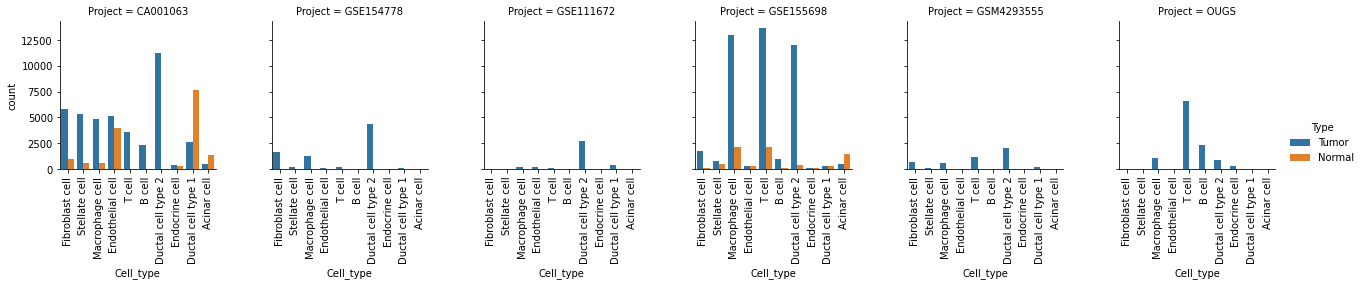

In [11]:
g = sns.catplot(
    data=adata.obs,
    kind="count",
    x="Cell_type",
    col="Project",
    hue="Type",
    col_wrap=6,
    height=3,
)
g.set_xticklabels(rotation=90)

In [12]:
peng_ad = adata[(adata.obs[["Project", "Type"]] == (PROJECT_ID, "Tumor")).all(axis=1)]
sc.pp.filter_genes(peng_ad, min_cells=3)
sc.pp.filter_cells(peng_ad, min_genes=200)

/home/wma/AGrEDA/.venv/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [13]:
peng_ad.var['mt'] = peng_ad.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(peng_ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

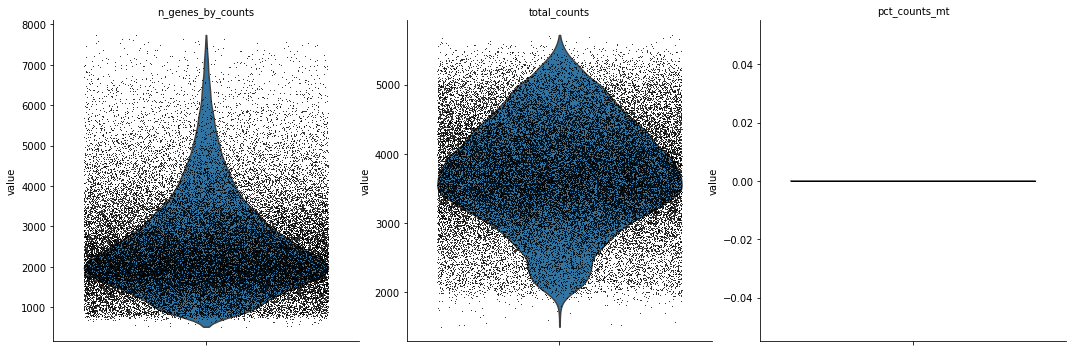

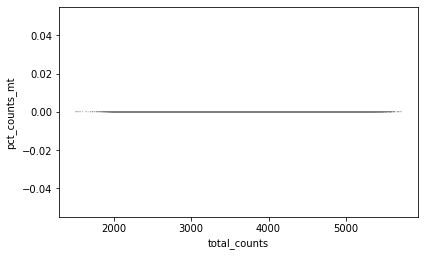

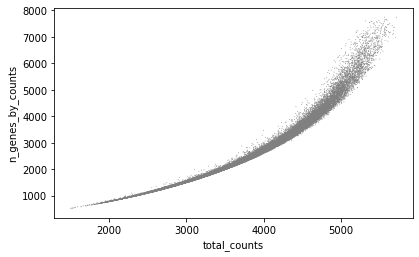

In [14]:
sc.pl.violin(peng_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(peng_ad, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(peng_ad, x='total_counts', y='n_genes_by_counts')

In [15]:
peng_ad

AnnData object with n_obs × n_vars = 41964 × 16999
    obs: 'CELL', 'Patient', 'Type', 'Cell_type', 'celltype0', 'celltype1', 'celltype2', 'celltype3', 'Patient2', 'nCount_RNA', 'nFeature_RNA', 'Project', 'orig.ident', 'Stage', 'Grade', 'Gender', 'Age', 'Percent_mito', 'Percent_ribo', 'Percent_hemo', 'percent.mt', 'predicted.id', 'prediction.score.Fibroblast.cell', 'prediction.score.Stellate.cell', 'prediction.score.Macrophage.cell', 'prediction.score.Endothelial.cell', 'prediction.score.T.cell', 'prediction.score.B.cell', 'prediction.score.Ductal.cell.type.2', 'prediction.score.Endocrine.cell', 'prediction.score.Ductal.cell.type.1', 'prediction.score.Acinar.cell', 'prediction.score.max', 'classical_score1', 'basal_score1', 'classical_score21', 'basal_score21', 'endocrine_score_1', 'immune_score_1', 'exocrine_score_1', 'activated_stroma_score_1', 'histone_score_1', 'normal_stroma_score_1', 'olfactory_score_1', 'na_score_1', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_

In [16]:
peng_ad.obs.rename(
    columns={
        "Cell_type": "cell_type",
        "Patient2": "subject",
    },
    inplace=True,
)

In [17]:
peng_ad.obs["sample_id"] = peng_ad.obs["subject"]

In [18]:
peng_ad.raw = peng_ad

In [19]:
peng_ad.write_h5ad(os.path.join(SC_OUT_DIR, f"{PROJECT_ID}.h5ad"))

plt.close()